# Data Exploration for Yelp Data

# Review JSON

In [104]:
import pandas as pd
import json
from tqdm import tqdm

line_count = len(open("data/review.json", encoding="utf8").readlines())
user_ids, business_ids, stars, dates,texts = [], [], [], [], []
with open("data/review.json", encoding="utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]]
        stars += [blob["stars"]]
        dates += [blob["date"]]
        texts += [blob["text"]]
ratings = pd.DataFrame(
 {"user_id": user_ids, "business_id": business_ids, "rating": stars, "date": dates, "text": texts}
)
user_counts = ratings["user_id"].value_counts()
active_users = user_counts.loc[user_counts >= 5].index.tolist()

100%|█████████████████████████████████████████████████████████████████████| 6685900/6685900 [01:10<00:00, 95443.21it/s]


In [3]:
ratings.head()

,user_id,business_id,rating,date
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,2013-05-07 04:34:36
1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,2017-01-14 21:30:33
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,2016-11-09 20:09:03
3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,2018-01-09 20:56:38
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,2018-01-30 23:07:38


In [9]:
len(ratings.user_id.unique()), len(ratings.business_id.unique())

(1637138, 192606)

In [26]:
ratings_active = ratings[~ratings['user_id'].isin(active_users)]

In [17]:
len(ratings_active.user_id.unique()), len(ratings_active.business_id.unique())

(1351008, 172970)

### Distribution of Ratings

Text(0.5, 0, 'Ratings')

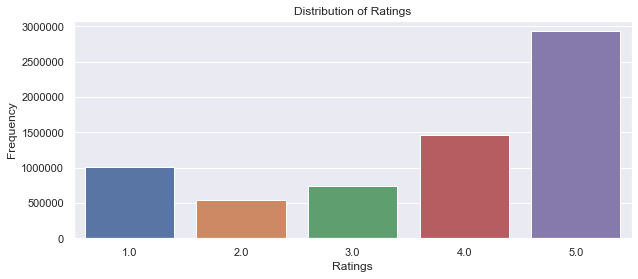

In [83]:
plt.figure(figsize=(10,4))
sns.set(style='darkgrid')
ax = sns.countplot(ratings['rating'])
# plt.title('Distribution of rating')
plt.title('Distribution of Ratings')
plt.ylabel('Frequency')
plt.xlabel('Ratings')

In [106]:
ratings_wordcloud = ratings.sample(n = 100000)

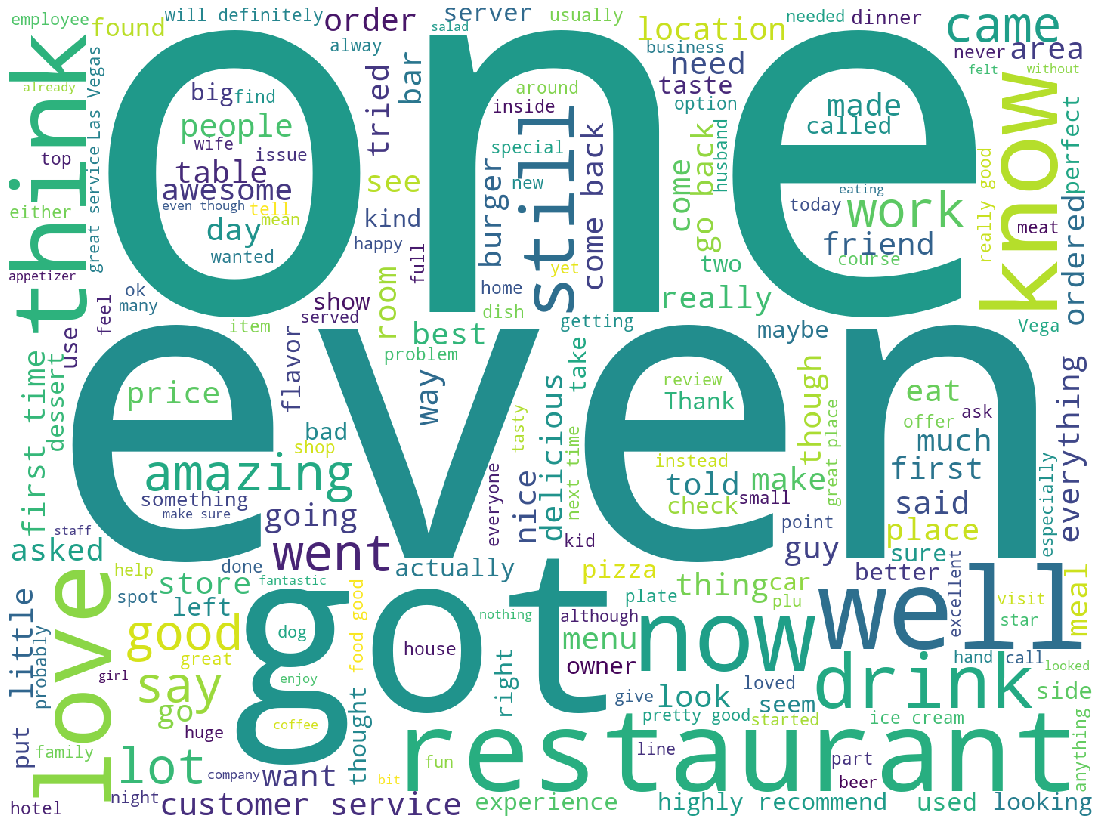

In [107]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height= 1080,max_words= 200, background_color = 'white').generate(' '.join(ratings_wordcloud['text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

## Business JSON

In [ ]:
# sample input
# {"business_id":"1SWheh84yJXfytovILXOAQ","name":"Arizona Biltmore Golf Club","address":"2818 E Camino Acequia Drive","city":"Phoenix","state":"AZ","postal_code":"85016","latitude":33.5221425,"longitude":-112.0184807,"stars":3.0,"review_count":5,"is_open":0,"attributes":{"GoodForKids":"False"},"categories":"Golf, Active Life","hours":null}

In [4]:
import pandas as pd
import json
from tqdm import tqdm
line_count = len(open("data/business.json", encoding="utf8").readlines())
business_ids, names, stars,review_counts = [], [], [], []
with open("data/business.json", encoding="utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        business_ids += [blob["business_id"]]
        names += [blob["name"]]
        stars += [blob["stars"]]
        review_counts += [blob["review_count"]]
#         compliment_counts += [blob["compliment_count"]]
business = pd.DataFrame(
 {"business_id": business_ids, "name": names, "star": stars, "review_count": review_counts}
)

100%|███████████████████████████████████████████████████████████████████████| 192609/192609 [00:05<00:00, 37164.57it/s]


### Restaurants' Average Ratings

Text(0.5, 0, "Stores' Average Ratings")

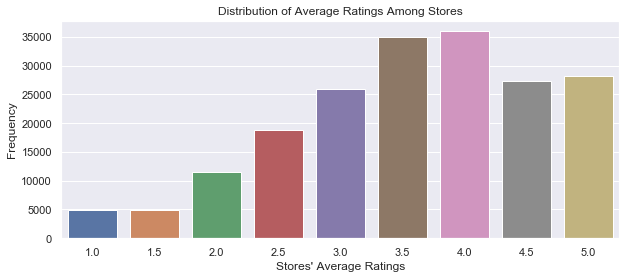

In [96]:
plt.figure(figsize=(10,4))
sns.set(style='darkgrid')
ax = sns.countplot(business.star)
# plt.title('Distribution of rating')
plt.title('Distribution of Average Ratings Among Stores')
plt.ylabel('Frequency')
plt.xlabel("Stores' Average Ratings")

### Top Name of Restaurant in Yelp

Text(0.5, 0, 'Count')

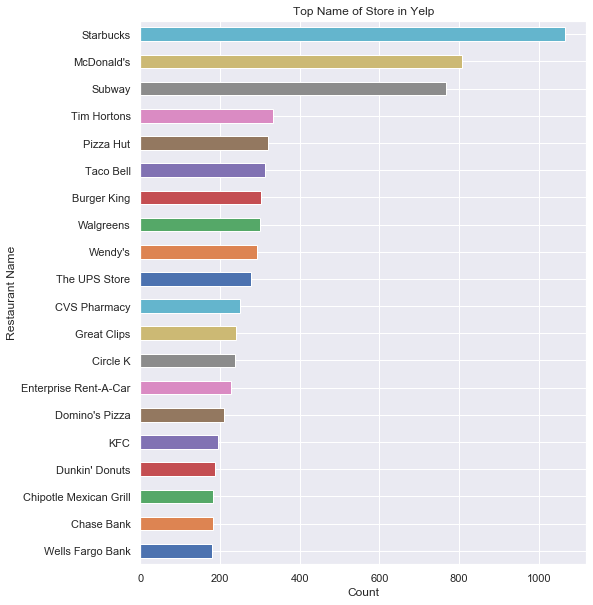

In [95]:
a = business.groupby('name').size().sort_values(ascending = False)[:20]
sns.set(style='darkgrid')
plt.figure(figsize=(8,10))
a.sort_values(ascending=True).plot(color=sns.color_palette(), kind='barh')
plt.title("Top Name of Store in Yelp")
plt.ylabel("Restaurant Name")
plt.xlabel("Count")

# Tip JSON

In [98]:
line_count = len(open("data/tip.json", encoding="utf8").readlines())
user_ids, business_ids, texts, compliment_counts = [], [], [], []
with open("data/tip.json", encoding="utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]]
        texts += [blob["text"]]
        compliment_counts += [blob["compliment_count"]]
tips = pd.DataFrame(
 {"user_id": user_ids, "business_id": business_ids, "text": texts, "compliment_count": compliment_counts}
)

100%|████████████████████████████████████████████████████████████████████| 1223094/1223094 [00:10<00:00, 120756.21it/s]


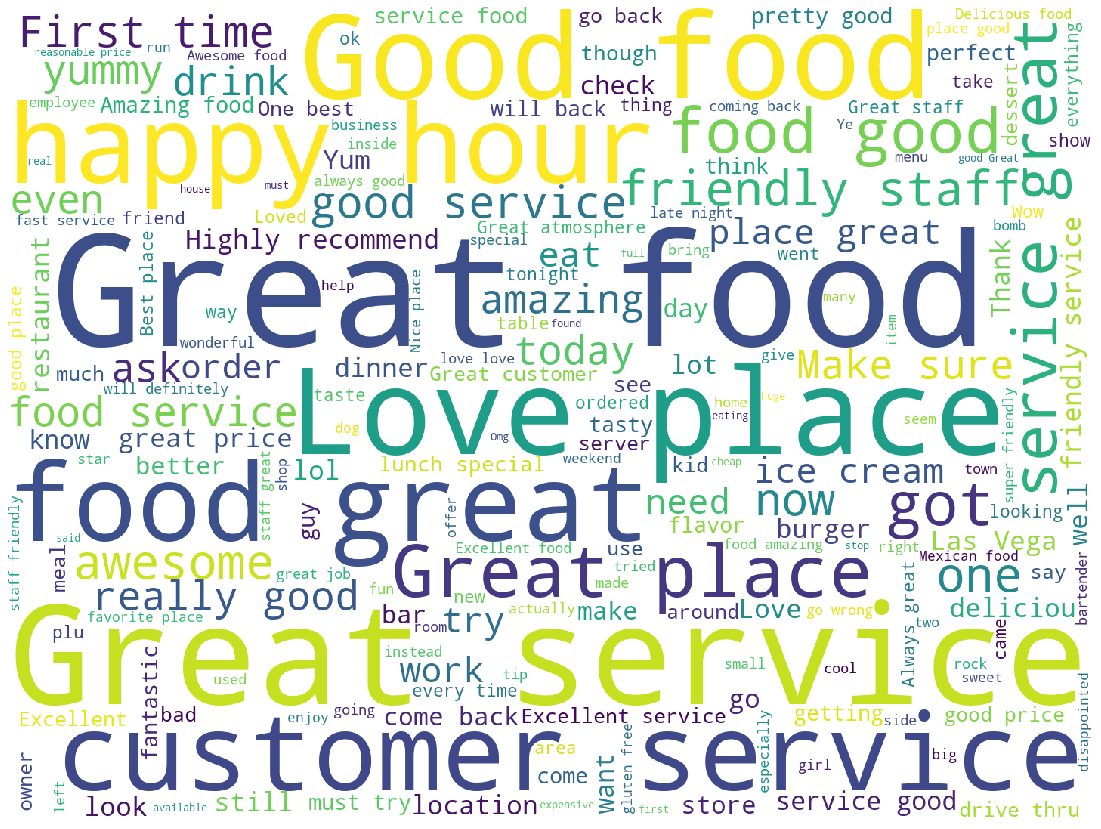

In [102]:
from wordcloud import WordCloud
# Word cloud
cloud = WordCloud(width=1440, height= 1080,max_words= 200, background_color = 'white').generate(' '.join(tips['text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');